In [323]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import resample

In [324]:
np.random.seed(42)
df = pd.read_csv("datos_accidentes_cerebrovasculares.csv")

In [325]:
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [326]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [327]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

<Axes: >

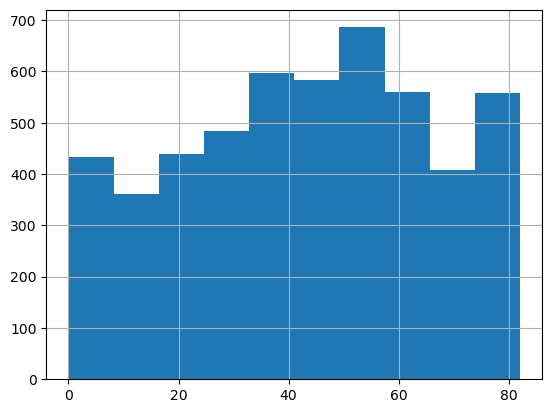

In [328]:
df.age.hist()

In [329]:
df.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

In [330]:
df.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

In [331]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


<Axes: >

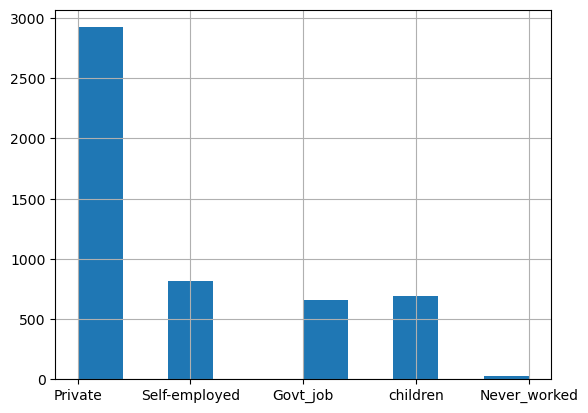

In [332]:
print(df.work_type.value_counts())
df.work_type.hist()

In [333]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [334]:
df.avg_glucose_level.describe()

count    5110.000000
mean      106.147677
std        45.283560
min        55.120000
25%        77.245000
50%        91.885000
75%       114.090000
max       271.740000
Name: avg_glucose_level, dtype: float64

<Axes: >

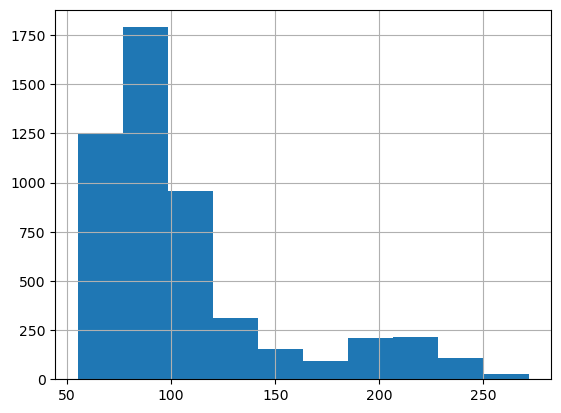

In [335]:
df.avg_glucose_level.hist()

In [336]:
df.bmi.describe()

count    4909.000000
mean       28.893237
std         7.854067
min        10.300000
25%        23.500000
50%        28.100000
75%        33.100000
max        97.600000
Name: bmi, dtype: float64

<Axes: >

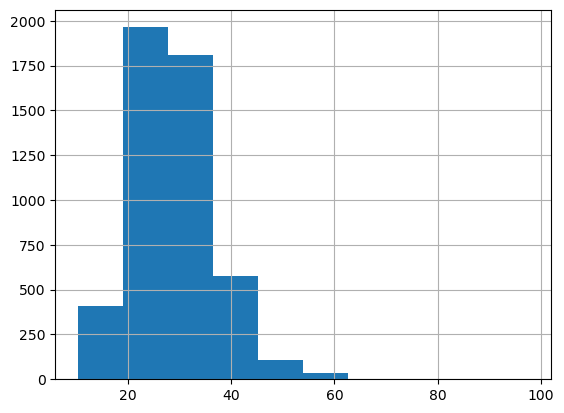

In [337]:
df.bmi.hist()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


<Axes: >

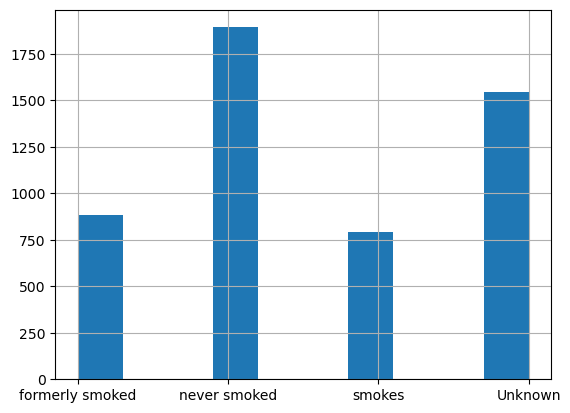

In [338]:
print(df.smoking_status.value_counts())
df.smoking_status.hist()

In [339]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [340]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [341]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [342]:
df.gender = df.gender.astype('category')
df.age = df.age.astype('int64')
df.hypertension = df.hypertension.astype('bool')
df.heart_disease = df.heart_disease.astype('bool')
df.work_type = df.work_type.astype('category')
df.Residence_type = df.Residence_type.astype('category')
df.avg_glucose_level = df.avg_glucose_level.astype('float64')
df.bmi = df.bmi.astype('float64')
df.smoking_status = df.smoking_status.astype('category')
df.stroke = df.stroke.astype('bool')

Eliminamos el id, ya que es una columna que obviamente no aporta ningun valor

In [343]:
df.drop('id', axis=1, inplace=True)

Ya que Residence_type solo tiene 2 clases, se transformará la variable a un booleano

In [344]:
df.Residence_type.replace('Urban', 1, inplace=True)
df.Residence_type.replace('Rural', 0, inplace=True)
df.Residence_type = df.Residence_type.astype('bool')

Lo mismo con ever_married

In [345]:
df.ever_married.replace('Yes', 1, inplace=True)
df.ever_married.replace('No', 0, inplace=True)
df.ever_married = df.ever_married.astype('bool')
df.ever_married

0       True
1       True
2       True
3       True
4       True
        ... 
5105    True
5106    True
5107    True
5108    True
5109    True
Name: ever_married, Length: 5110, dtype: bool

In [346]:
df.ever_married.value_counts()

True     3353
False    1757
Name: ever_married, dtype: int64

In [347]:
df.dtypes

gender               category
age                     int64
hypertension             bool
heart_disease            bool
ever_married             bool
work_type            category
Residence_type           bool
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object

In [348]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [349]:
df_train, df_test = train_test_split(
    df,
    test_size=0.2,
    random_state=42,
    stratify=df['stroke']
)

In [350]:
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [351]:
imputer = SimpleImputer(strategy='mean')
imputer = imputer.fit(df['bmi'].values.reshape(-1,1))
df_train.bmi = imputer.transform(df_train['bmi'].values.reshape(-1,1))
df_test.bmi = imputer.transform(df_test['bmi'].values.reshape(-1,1))

In [352]:
df_test.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

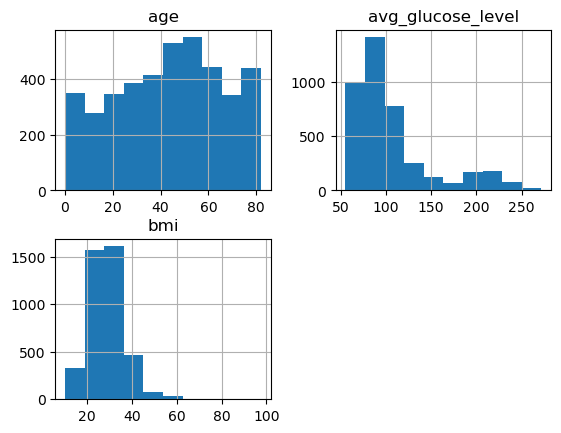

In [353]:
df_train.hist()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>, <Axes: >]], dtype=object)

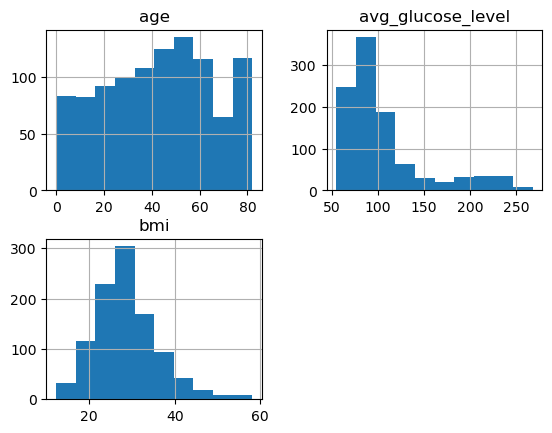

In [354]:
df_test.hist()

In [355]:
df_train.dtypes

gender               category
age                     int64
hypertension             bool
heart_disease            bool
ever_married             bool
work_type            category
Residence_type           bool
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                   bool
dtype: object

In [356]:
categoricas = df.select_dtypes(include='category').columns

onehotencoded_train = []
onehotencoded_test = []
for i in categoricas:
    encoder = OneHotEncoder()
    col_encoded_train = encoder.fit_transform(df_train[i].values.reshape(-1,1)).toarray()
    col_encoded_test = encoder.transform(df_test[i].values.reshape(-1,1)).toarray()
    col_df_train = pd.DataFrame(col_encoded_train, columns=encoder.categories_[0])
    col_df_test = pd.DataFrame(col_encoded_test, columns=encoder.categories_[0])
    col_df_train = col_df_train.astype('bool')
    col_df_test = col_df_test.astype('bool')
    onehotencoded_train.append(col_df_train)
    onehotencoded_test.append(col_df_test)
    
transformed_df_train = df_train.copy()
transformed_df_test = df_test.copy()
categories_train = pd.concat(onehotencoded_train, axis=1)
categories_test = pd.concat(onehotencoded_test, axis=1)
transformed_df_train = pd.concat([transformed_df_train, categories_train], axis=1)
transformed_df_test = pd.concat([transformed_df_test, categories_test], axis=1)
transformed_df_train.drop(['gender', 'work_type', 'smoking_status'], axis=1, inplace=True)
transformed_df_test.drop(['gender', 'work_type', 'smoking_status'], axis=1, inplace=True)

In [357]:
numericas = df.select_dtypes(include=['int', 'float']).columns

scaled_train = []
scaled_test = []
for i in numericas:
    scaler = MinMaxScaler()
    col_scaled_train = scaler.fit_transform(df_train[i].values.reshape(-1,1))
    col_scaled_test = scaler.transform(df_test[i].values.reshape(-1,1))
    col_scaled_train_df = pd.DataFrame(col_scaled_train, columns=[i+'_scaled'])
    col_scaled_test_df = pd.DataFrame(col_scaled_test, columns=[i+'_scaled'])
    scaled_train.append(col_scaled_train_df)
    scaled_test.append(col_scaled_test_df)
scaled_numerical_train_df = pd.concat(scaled_train, axis=1)
scaled_numerical_test_df = pd.concat(scaled_test, axis=1)

In [358]:
final_train_df = pd.concat([transformed_df_train, scaled_numerical_train_df], axis = 1)
final_test_df = pd.concat([transformed_df_test, scaled_numerical_test_df], axis = 1)
final_train_df.drop(['age', 'avg_glucose_level', 'bmi'], axis = 1, inplace=True)
final_test_df.drop(['age', 'avg_glucose_level', 'bmi'], axis = 1, inplace=True)

<Axes: >

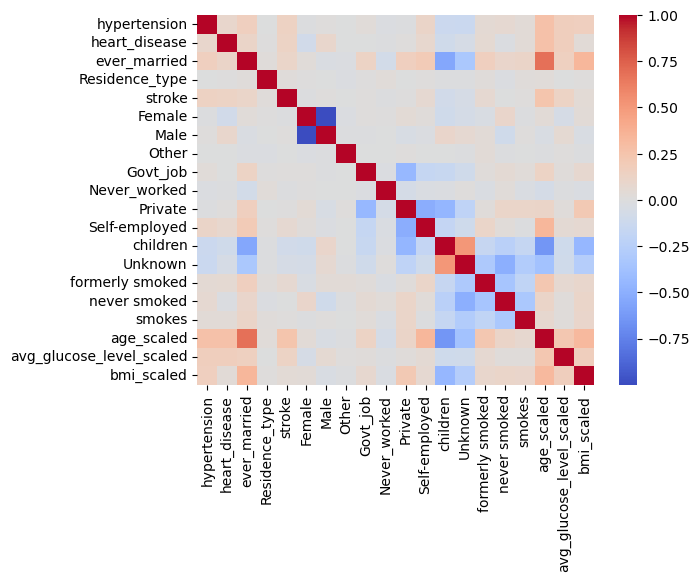

In [359]:
import seaborn as sns

sns.heatmap(final_train_df.corr(), cmap='coolwarm', fmt=".2f")

In [360]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=9)
selector.fit(final_train_df.drop('stroke', axis=1), final_train_df['stroke'])
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

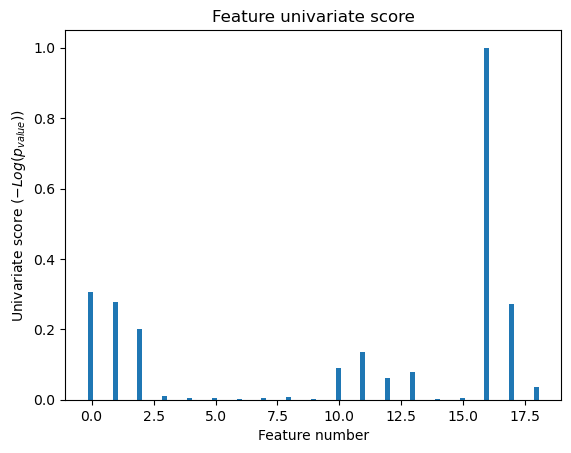

In [361]:
X_indices = np.arange(final_train_df.shape[-1]-1)
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.show()

In [362]:
features_selected = selector.get_feature_names_out()
features_selected = np.append(features_selected, 'stroke')
features_selected

array(['hypertension', 'heart_disease', 'ever_married', 'Self-employed',
       'children', 'Unknown', 'formerly smoked', 'age_scaled',
       'avg_glucose_level_scaled', 'stroke'], dtype=object)

In [363]:
final_train_df = final_train_df[features_selected]
final_test_df = final_test_df[features_selected]

# Entrenamiento de modelos

In [364]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

Dado que los datos de los que se dispone estan muy desvalanceados en cuanto a la variable a predecir, hay muchos más valores negativos que positivos, se han valanceado. Primero se realizo un upsampling en los datos de entrenamiento, pero producia un sobreaprendizaje muy elevado, asi que se optó por un downsampling, de forma que los datos de entrenamiento se valancearan y consiguiesemos un mejor entrenamiento.

In [365]:
df_majority = final_train_df[final_train_df['stroke'] == 0]
df_minority = final_train_df[final_train_df['stroke'] == 1]

# Subsampling de la clase mayoritaria para igualar el número de muestras con la clase minoritaria
df_majority_downsampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combinar el submuestreo de la clase mayoritaria con la clase minoritaria
train_df_balanced = pd.concat([df_majority_downsampled, df_minority])

print(train_df_balanced['stroke'].value_counts())

False    199
True     199
Name: stroke, dtype: int64


Una vez valanceado el conjunto de entrenamiento procedemos a separar los datos de la variable a predecir para poder hacer el analisis de los modelos.

In [366]:
final_df_train_Y = train_df_balanced.loc[:, 'stroke']
final_df_test_Y = final_test_df.loc[:, 'stroke']

In [367]:
final_df_train_X = train_df_balanced.drop('stroke', axis=1)
final_df_test_X = final_test_df.drop('stroke', axis=1)

In [368]:
final_df_test_Y

0       False
1       False
2       False
3       False
4       False
        ...  
1017    False
1018    False
1019    False
1020    False
1021    False
Name: stroke, Length: 1022, dtype: bool

### Selección de hyperparametros
Para realizar los entrenamientos de los modelos se ha seguido el mismo patrón, primero se ha hecho un GridSearch con validación cruzada de 5 pliegues para seleccionar los mejores hyperparámetros para obtener el mayor recall posible, al ser un problema médico se valora que es más importante seleccionar el mayor numero de positivos posible, aún que esto haga que muchos negativos pasen por positivos. Una vez hecho esto, se selecciona el mejor modelo con los hyperparametros que han dado un mejor resultado y haremos una predicción sobre el conjunto de test, obteniendo asi la matriz de confusión del modelo.

# KNN

In [369]:
hyperparameters_knn = {'n_neighbors': range(1, 100, 5)}

In [370]:
k_neigh = KNeighborsClassifier()
modelCV = GridSearchCV(k_neigh,
                       hyperparameters_knn,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


np.random.seed(42)

modelCV.fit(final_df_train_X, final_df_train_Y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 100, 5)},
             return_train_score=True, scoring='recall')

In [371]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_n_neighbors', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_n_neighbors,mean_test_score,std_test_score,rank_test_score
4,21,0.774231,0.056009,1
6,31,0.759615,0.085286,2
5,26,0.749359,0.063964,3
8,41,0.749231,0.050976,4
14,71,0.748846,0.062830,5
10,51,0.744103,0.056654,6
16,81,0.743590,0.062565,7
7,36,0.739231,0.065063,8
9,46,0.729103,0.054154,9
11,56,0.728974,0.056662,10


Debido al rápido crecimietno del overfitting, tomamos el valor de vecinos en el punto donde la curva empieza a crecer desproporcionadamente

In [372]:
best_model_knn= modelCV.best_estimator_

In [373]:
best_model_knn.fit(final_df_train_X, final_df_train_Y)

KNeighborsClassifier(n_neighbors=21)

In [374]:
knn_predict=best_model_knn.predict(final_df_test_X)

In [375]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=knn_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[658 314]
 [  9  41]]


# Random Forest

In [376]:
final_df_train_X

,hypertension,heart_disease,ever_married,Self-employed,children,Unknown,formerly smoked,age_scaled,avg_glucose_level_scaled
2513,False,False,True,False,False,False,False,0.390244,0.118549
2437,False,False,False,False,False,False,False,0.585366,0.213692
2553,False,False,True,False,False,False,True,0.378049,0.223571
3887,False,False,True,False,False,False,True,0.731707,0.827855
335,False,False,False,False,True,True,False,0.158537,0.001246
...,...,...,...,...,...,...,...,...,...
4016,False,True,True,False,False,False,False,0.865854,0.122980
4031,False,True,True,True,False,False,True,0.975610,0.912196
4042,False,False,False,False,False,False,False,0.841463,0.181285
4059,False,False,True,False,False,False,True,0.951220,0.843089


In [377]:
hyperparameters_rf = param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [2, 5, 10],
        'max_features' : [3, 4, 5, 7]
    }

In [378]:
rf = RandomForestClassifier()
modelCV = GridSearchCV(rf,
                       hyperparameters_rf,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


modelCV.fit(final_df_train_X, final_df_train_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 5, 10], 'max_features': [3, 4, 5, 7],
                         'n_estimators': [50, 100, 150]},
             return_train_score=True, scoring='recall')

In [379]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_n_estimators', 'param_max_features', 'param_max_depth', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_n_estimators,param_max_features,param_max_depth,mean_test_score,std_test_score,rank_test_score
1,100,3,2,0.914615,0.046291,1
4,100,4,2,0.914487,0.054004,2
8,150,5,2,0.914487,0.054004,2
2,150,3,2,0.909487,0.051588,4
5,150,4,2,0.909487,0.046490,4
11,150,7,2,0.909487,0.046490,4
3,50,4,2,0.904615,0.036540,7
7,100,5,2,0.904487,0.051051,8
10,100,7,2,0.904487,0.051051,8
9,50,7,2,0.904359,0.048889,10


In [380]:
best_model_rf= modelCV.best_estimator_

In [381]:
rf_predict=best_model_rf.predict(final_df_test_X)

In [382]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=rf_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[617 355]
 [  8  42]]


# Regresion logistica

In [383]:
hyperparameters_rl = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]}

In [384]:
rl = LogisticRegression()
modelCV = GridSearchCV(rl,
                       hyperparameters_rl,
                       cv=5,
                       scoring='recall',
                       return_train_score=True,
                       n_jobs=-1)


# En KNN no hay aprendizaje en sí, pero hay que ejecutar este comando para poder hacer inferencias
modelCV.fit(final_df_train_X, final_df_train_Y)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10]},
             return_train_score=True, scoring='recall')

In [385]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_C,mean_test_score,std_test_score,rank_test_score
3,0.1,0.814231,0.045810,1
4,1,0.814103,0.046209,2
2,0.01,0.798846,0.039535,3
1,0.001,0.794487,0.089406,4
5,10,0.778590,0.057123,5
0,0.0001,0.680000,0.351212,6


In [386]:
best_model_rl= modelCV.best_estimator_

In [387]:
rl_predict=best_model_rl.predict(final_df_test_X)

In [388]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=rl_predict)
print('La matriz de confusión del KNN es: \n{}'.format(matriz))

La matriz de confusión del KNN es: 
[[686 286]
 [ 12  38]]


# SVC

In [389]:
c = [10**i for i in range(-6, 3, 1)]
hyperparameters_svc = {
    
    'C': c
}

In [390]:
svc = SVC(random_state = 42)
modelCV = GridSearchCV(
    svc,
    hyperparameters_svc,
    cv=5,
    scoring='recall',
    return_train_score=True,
    n_jobs=-1
    )



modelCV.fit(final_df_train_X, final_df_train_Y)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10,
                               100]},
             return_train_score=True, scoring='recall')

In [391]:
cv_results = pd.DataFrame(modelCV.cv_results_)
cv_results.loc[:, ['param_C', 'mean_test_score', 'std_test_score', 'rank_test_score']].sort_values(by='rank_test_score')

,param_C,mean_test_score,std_test_score,rank_test_score
5,0.1,0.919744,0.039811,1
6,1,0.839487,0.050887,2
0,0.000001,0.775000,0.387943,3
1,0.00001,0.775000,0.387943,3
2,0.0001,0.775000,0.387943,3
3,0.001,0.775000,0.387943,3
4,0.01,0.775000,0.387943,3
7,10,0.733846,0.089794,8
8,100,0.728846,0.093549,9


In [392]:
best_model_svc= modelCV.best_estimator_

In [393]:
svc_predict=best_model_svc.predict(final_df_test_X)

In [394]:
matriz = confusion_matrix(y_true=final_df_test_Y, y_pred=svc_predict)
print('La matriz de confusión del SVC es: \n{}'.format(matriz))

La matriz de confusión del SVC es: 
[[488 484]
 [  5  45]]


### Matrices de confusion
Como podemos ver en las matrices de confusión se estan seleccionando casi todos los positivos de forma correcta, aún que haya muchos falsos positivos,pero como ya se explicó antes en este dominio del problema es preferible un falso positivo que un falso negativo.

# Análisis de los modelos 

Una vez con los modelos ya entrenados procedemos a calcular las métricas de clasificación de cada modelo y analizarlas.

In [395]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
precision = precision_score(final_df_test_Y, svc_predict)
recall = recall_score(final_df_test_Y, svc_predict)
f1 = f1_score(final_df_test_Y, svc_predict)
accuracy = accuracy_score(final_df_test_Y, svc_predict)
print('La precisión es del SVC: {}'.format(precision))
print('El recall es del SVC: {}'.format(recall))
print('El f1-score es del SVC: {}'.format(f1))
print('La accuracy es del SVC: {}'.format(accuracy))
print('\n')

precision = precision_score(final_df_test_Y, rf_predict)
recall = recall_score(final_df_test_Y, rf_predict)
f1 = f1_score(final_df_test_Y, rf_predict)
accuracy = accuracy_score(final_df_test_Y, rf_predict)
print('La precisión es del RF: {}'.format(precision))
print('El recall es del RF: {}'.format(recall))
print('El f1-score es del RF: {}'.format(f1))
print('La accuracy es del RF: {}'.format(accuracy))
print('\n')

precision = precision_score(final_df_test_Y, knn_predict)
recall = recall_score(final_df_test_Y, knn_predict)
f1 = f1_score(final_df_test_Y, knn_predict)
accuracy = accuracy_score(final_df_test_Y, knn_predict)
print('La precisión es del KNN: {}'.format(precision))
print('El recall es del KNN: {}'.format(recall))
print('El f1-score es del :KNN {}'.format(f1))
print('La accuracy es del KNN: {}'.format(accuracy))
print('\n')

precision = precision_score(final_df_test_Y, rl_predict)
recall = recall_score(final_df_test_Y, rl_predict)
f1 = f1_score(final_df_test_Y, rl_predict)
accuracy = accuracy_score(final_df_test_Y, rl_predict)
print('La precisión es del RL: {}'.format(precision))
print('El recall es del RL: {}'.format(recall))
print('El f1-score es del RL: {}'.format(f1))
print('La accuracy es del RL: {}'.format(accuracy))

La precisión es del SVC: 0.08506616257088846
El recall es del SVC: 0.9
El f1-score es del SVC: 0.155440414507772
La accuracy es del SVC: 0.5215264187866928


La precisión es del RF: 0.10579345088161209
El recall es del RF: 0.84
El f1-score es del RF: 0.1879194630872483
La accuracy es del RF: 0.6448140900195695


La precisión es del KNN: 0.11549295774647887
El recall es del KNN: 0.82
El f1-score es del :KNN 0.20246913580246914
La accuracy es del KNN: 0.6839530332681018


La precisión es del RL: 0.11728395061728394
El recall es del RL: 0.76
El f1-score es del RL: 0.20320855614973263
La accuracy es del RL: 0.7084148727984344


Como hemos maximizado el recall la precisión de los modelos se ve realmente afectada y por ello el f1-score también. Por otra parte el recall y la accuracy de todos los modelos es relativamente alto, son valores que nos podriamos esperar con las descripción que hemos dado del problema. 
Visto así es dificil determinar cual es el mejor modelo, ya que ninguno presenta valores superiores en todas las metricas respecto al resto, por ello hemos hecho un calculo de la curva roc para detirminar el mejor modelo.

In [396]:
from sklearn.metrics import auc, roc_curve
fpr_svc, tpr_svc, thresholds = roc_curve(final_df_test_Y, svc_predict, pos_label=1)
fpr_rf, tpr_rf, thresholds = roc_curve(final_df_test_Y, rf_predict, pos_label=1)
fpr_knn, tpr_knn, thresholds = roc_curve(final_df_test_Y, knn_predict, pos_label=1)
fpr_rl, tpr_rl, thresholds = roc_curve(final_df_test_Y, rl_predict, pos_label=1)

In [397]:
print('El área bajo la curva es del SVC: {}'.format(auc(fpr_svc, tpr_svc)))
print('El área bajo la curva es del RF: {}'.format(auc(fpr_rf, tpr_rf)))
print('El área bajo la curva es del KNN: {}'.format(auc(fpr_knn, tpr_knn)))
print('El área bajo la curva es del RL: {}'.format(auc(fpr_rl, tpr_rl)))

El área bajo la curva es del SVC: 0.7010288065843621
El área bajo la curva es del RF: 0.7373868312757201
El área bajo la curva es del KNN: 0.7484773662551439
El área bajo la curva es del RL: 0.732880658436214


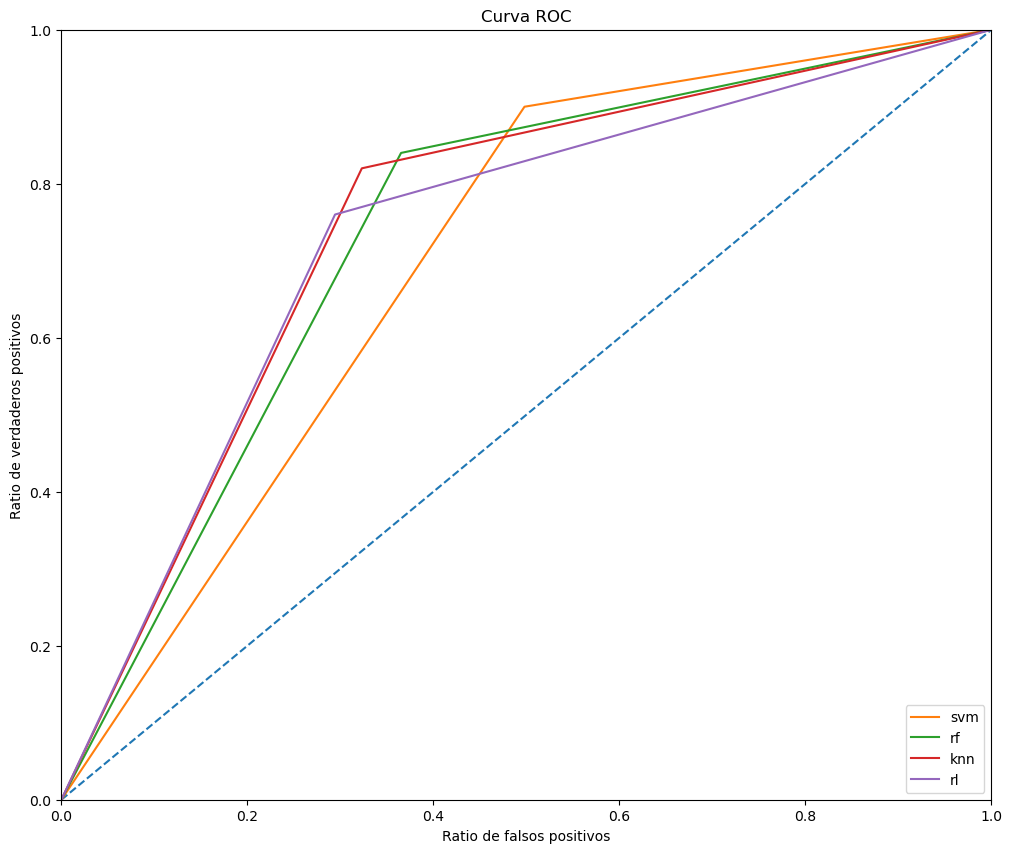

In [398]:
# Crear figura
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)

# Pintar la diagonal
ax.plot([0,1],[0,1],ls='--')

# Pintar los ejes
ax.set_xlabel('Ratio de falsos positivos')
ax.set_ylabel('Ratio de verdaderos positivos')
ax.set_title('Curva ROC')

# Delimitar los ejes
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1.0])

# Pintar la curva
ax.plot(fpr_svc, tpr_svc, label='svm')
ax.plot(fpr_rf, tpr_rf, label='rf')
ax.plot(fpr_knn, tpr_knn, label='knn')
ax.plot(fpr_rl, tpr_rl, label='rl')

# Mostrar plot
ax.legend(loc='lower right')
plt.show()

### Analisis de la curva ROC
Tanto en el diagrama como en los valores podemos ver que el mejor modelo en este caso es KNN. Así que el mejor modelo que hemos entrenado ha sido KNN y es el que usariamos si quisiesemos resolver un problema así en la vida real